In [572]:
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import numpy as np
import os

In [573]:
#  Import Louisville Kentucky data without irrelevant columns

In [574]:
Lou = pd.read_csv(os.path.join("C:\\Users\\kam52\\OneDrive\\Desktop\\DA2\\Comparing-Crime-LouisvilleKY-MemphisTN\\Louisville_Metro_KY_-_Crime_Data_2022.csv"),
                 parse_dates=['DATE_REPORTED'], usecols = ['DATE_REPORTED', 'CRIME_TYPE'])
Lou

,DATE_REPORTED,CRIME_TYPE
0,2022-01-01 09:10:00,ASSAULT
1,2022-01-01 00:26:00,VANDALISM
2,2022-01-01 00:56:00,VEHICLE BREAK-IN/THEFT
3,2022-01-01 01:14:00,VANDALISM
4,2022-01-01 01:21:00,BURGLARY
...,...,...
56323,2022-10-17 14:47:00,THEFT/LARCENY
56324,2022-10-17 15:30:00,ASSAULT
56325,2022-10-17 15:31:00,OTHER
56326,2022-10-17 15:14:00,FRAUD


In [575]:
#  Import Memphis Tenessee data

In [576]:
df = pd.read_csv(os.path.join("C:\\Users\\kam52\\OneDrive\\Desktop\\DA2\\Comparing-Crime-LouisvilleKY-MemphisTN\\Memphis_Police_Department_Aggregate_Crime.csv"))
df

,MONTHYEAR,MONTH,YEAR,CATEGORY,COUNT,Month_YOY_Percent_Change,Count YTD,YTD_Percent_Change,MonthOrder
0,January 2006,January,2006,Major Property Crime,4603,NaN,4603,NaN,1
1,January 2006,January,2006,Major Violent Crime,992,NaN,992,NaN,1
2,February 2006,February,2006,Major Property Crime,3552,NaN,8155,NaN,2
3,February 2006,February,2006,Major Violent Crime,716,NaN,1708,NaN,2
4,March 2006,March,2006,Major Property Crime,4465,NaN,12620,NaN,3
...,...,...,...,...,...,...,...,...,...
181,July 2022,July,2022,Major Violent Crime,851,-10.420000,5783,-0.580000,7
182,August 2022,August,2022,Major Property Crime,4144,35.248042,27735,25.965119,8
183,August 2022,August,2022,Major Violent Crime,837,-4.123711,6620,-1.046338,8
184,September 2022,September,2022,Major Property Crime,4045,34.073583,31780,26.942281,9


Removing columns from Memphis data

In [577]:
df.drop(["Month_YOY_Percent_Change", "YTD_Percent_Change", "MonthOrder", "MONTHYEAR"], axis=1, inplace=True)
df

,MONTH,YEAR,CATEGORY,COUNT,Count YTD
0,January,2006,Major Property Crime,4603,4603
1,January,2006,Major Violent Crime,992,992
2,February,2006,Major Property Crime,3552,8155
3,February,2006,Major Violent Crime,716,1708
4,March,2006,Major Property Crime,4465,12620
...,...,...,...,...,...
181,July,2022,Major Violent Crime,851,5783
182,August,2022,Major Property Crime,4144,27735
183,August,2022,Major Violent Crime,837,6620
184,September,2022,Major Property Crime,4045,31780


In [578]:
#  Type the data to prepare to select only 2022 information

In [579]:
Lou.dtypes

DATE_REPORTED    datetime64[ns]
CRIME_TYPE               object
dtype: object

In [580]:
df.dtypes

MONTH        object
YEAR          int64
CATEGORY     object
COUNT         int64
Count YTD     int64
dtype: object

In [581]:
#Totaling CrimeType counts

In [582]:
SumLou = Lou.groupby('CRIME_TYPE').count()
print(SumLou)

                          DATE_REPORTED
CRIME_TYPE                             
ARSON                               109
ASSAULT                           12934
BURGLARY                           3482
DISTURBING THE PEACE                261
DRUGS/ALCOHOL VIOLATIONS           4027
DUI                                   1
FRAUD                              2627
HOMICIDE                            124
MOTOR VEHICLE THEFT                3479
OTHER                              8877
ROBBERY                             871
SEX CRIMES                          424
THEFT/LARCENY                      9200
VANDALISM                          4810
VEHICLE BREAK-IN/THEFT             4322
WEAPONS                             780


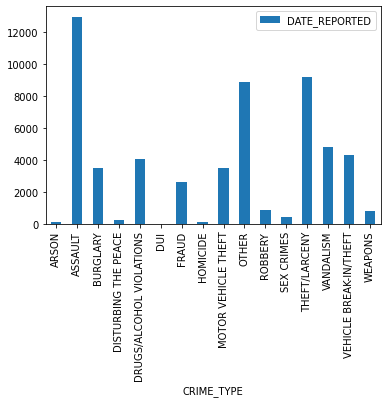

In [583]:
SumLou = Lou.groupby('CRIME_TYPE').count().plot(kind="bar")

In [584]:
#Seperating date and time from Lou DATE_REPORTED

In [585]:
Lou['DATE'] = [d.date() for d in Lou['DATE_REPORTED']]
Lou['TIME'] = [d.time() for d in Lou['DATE_REPORTED']]
Lou

,DATE_REPORTED,CRIME_TYPE,DATE,TIME
0,2022-01-01 09:10:00,ASSAULT,2022-01-01,09:10:00
1,2022-01-01 00:26:00,VANDALISM,2022-01-01,00:26:00
2,2022-01-01 00:56:00,VEHICLE BREAK-IN/THEFT,2022-01-01,00:56:00
3,2022-01-01 01:14:00,VANDALISM,2022-01-01,01:14:00
4,2022-01-01 01:21:00,BURGLARY,2022-01-01,01:21:00
...,...,...,...,...
56323,2022-10-17 14:47:00,THEFT/LARCENY,2022-10-17,14:47:00
56324,2022-10-17 15:30:00,ASSAULT,2022-10-17,15:30:00
56325,2022-10-17 15:31:00,OTHER,2022-10-17,15:31:00
56326,2022-10-17 15:14:00,FRAUD,2022-10-17,15:14:00


In [586]:
Lou.dtypes

DATE_REPORTED    datetime64[ns]
CRIME_TYPE               object
DATE                     object
TIME                     object
dtype: object

In [587]:
#Changing DATE from object to datetime

In [588]:
Lou["DATE"] = pd.to_datetime(Lou["DATE"])
Lou.dtypes

DATE_REPORTED    datetime64[ns]
CRIME_TYPE               object
DATE             datetime64[ns]
TIME                     object
dtype: object

In [589]:
# Removing columns no longer needed

In [590]:
Lou.drop(["DATE_REPORTED", "TIME"], axis=1, inplace=True)    
Lou

,CRIME_TYPE,DATE
0,ASSAULT,2022-01-01
1,VANDALISM,2022-01-01
2,VEHICLE BREAK-IN/THEFT,2022-01-01
3,VANDALISM,2022-01-01
4,BURGLARY,2022-01-01
...,...,...
56323,THEFT/LARCENY,2022-10-17
56324,ASSAULT,2022-10-17
56325,OTHER,2022-10-17
56326,FRAUD,2022-10-17


In [591]:
#  Selecting only the 2022 data for comparison

In [592]:
Mem =df.loc[df['YEAR']>2021]
Mem

,MONTH,YEAR,CATEGORY,COUNT,Count YTD
168,January,2022,Major Property Crime,3205,3205
169,January,2022,Major Violent Crime,781,781
170,February,2022,Major Property Crime,2680,5885
171,February,2022,Major Violent Crime,641,1422
172,March,2022,Major Property Crime,2771,8656
173,March,2022,Major Violent Crime,767,2189
174,April,2022,Major Property Crime,3064,11720
175,April,2022,Major Violent Crime,869,3058
176,May,2022,Major Property Crime,3736,15456
177,May,2022,Major Violent Crime,983,4041


In [593]:
#  Memphis data is Aggregate data where Louisville is per occurance, 
#  therefore I need to summarize the Louisville data to compare to Memphis.

In [594]:
lou2 = Lou.rename({'CRIME_TYPE': 'CATEGORY'}, axis=1)
lou2

,CATEGORY,DATE
0,ASSAULT,2022-01-01
1,VANDALISM,2022-01-01
2,VEHICLE BREAK-IN/THEFT,2022-01-01
3,VANDALISM,2022-01-01
4,BURGLARY,2022-01-01
...,...,...
56323,THEFT/LARCENY,2022-10-17
56324,ASSAULT,2022-10-17
56325,OTHER,2022-10-17
56326,FRAUD,2022-10-17


In [595]:
TypeLou =  pd.unique(lou2['CATEGORY'])
TypeLou

array(['ASSAULT', 'VANDALISM', 'VEHICLE BREAK-IN/THEFT', 'BURGLARY',
       'OTHER', 'THEFT/LARCENY', 'ROBBERY', 'DRUGS/ALCOHOL VIOLATIONS',
       'MOTOR VEHICLE THEFT', 'DISTURBING THE PEACE', 'FRAUD',
       'SEX CRIMES', 'HOMICIDE', 'WEAPONS', 'ARSON', 'DUI'], dtype=object)

In [596]:
for index in lou2.index:
    if lou2.loc[index,'CATEGORY']=='ASSAULT':
        lou2.loc[index,'CATEGORY'] = 'Major Violent Crime'
    elif lou2.loc[index,'CATEGORY']=='ROBBERY':
        lou2.loc[index,'CATEGORY'] = 'Major Violent Crime'
    elif lou2.loc[index,'CATEGORY']=='SEX CRIMES':
        lou2.loc[index,'CATEGORY'] = 'Major Violent Crime'
    elif lou2.loc[index,'CATEGORY']=='HOMICIDE':
        lou2.loc[index,'CATEGORY'] = 'Major Violent Crime'
    elif lou2.loc[index,'CATEGORY']=='VEHICLE BREAK-IN/THEFT':
        lou2.loc[index,'CATEGORY'] = 'Major Property Crime'
    elif lou2.loc[index,'CATEGORY']=='BURGLARY':
        lou2.loc[index,'CATEGORY'] = 'Major Property Crime'
    elif lou2.loc[index,'CATEGORY']=='ARSON':
        lou2.loc[index,'CATEGORY'] = 'Major Property Crime'
    elif lou2.loc[index,'CATEGORY']=='MOTOR VEHICLE THEFT':
        lou2.loc[index,'CATEGORY'] = 'Major Property Crime'
    elif lou2.loc[index,'CATEGORY']=='THEFT/LARCENY':
        lou2.loc[index,'CATEGORY'] = 'Major Property Crime'
    elif lou2.loc[index,'CATEGORY']=='VANDALISM':
        lou2.loc[index,'CATEGORY'] = 'OTHER'    
    elif lou2.loc[index,'CATEGORY']=='DRUGS/ALCOHOL VIOLATIONS':
        lou2.loc[index,'CATEGORY'] = 'OTHER'
    elif lou2.loc[index,'CATEGORY']=='DISTURBING THE PEACE':
        lou2.loc[index,'CATEGORY'] = 'OTHER'
    elif lou2.loc[index,'CATEGORY']=='FRAUD':
        lou2.loc[index,'CATEGORY'] = 'OTHER' 
    elif lou2.loc[index,'CATEGORY']=='WEAPONS':
        lou2.loc[index,'CATEGORY'] = 'OTHER'    
    elif lou2.loc[index,'CATEGORY']=='DUI':
        lou2.loc[index,'CATEGORY'] = 'OTHER'

In [597]:
print(lou2)

                   CATEGORY       DATE
0       Major Violent Crime 2022-01-01
1                     OTHER 2022-01-01
2      Major Property Crime 2022-01-01
3                     OTHER 2022-01-01
4      Major Property Crime 2022-01-01
...                     ...        ...
56323  Major Property Crime 2022-10-17
56324   Major Violent Crime 2022-10-17
56325                 OTHER 2022-10-17
56326                 OTHER 2022-10-17
56327   Major Violent Crime 2022-10-17

[56328 rows x 2 columns]


In [598]:
#to seperate the month out into a new column to sort data by month

In [599]:
lou2["MONTH"] = lou2["DATE"]\
    .dt.month_name()
lou2

,CATEGORY,DATE,MONTH
0,Major Violent Crime,2022-01-01,January
1,OTHER,2022-01-01,January
2,Major Property Crime,2022-01-01,January
3,OTHER,2022-01-01,January
4,Major Property Crime,2022-01-01,January
...,...,...,...
56323,Major Property Crime,2022-10-17,October
56324,Major Violent Crime,2022-10-17,October
56325,OTHER,2022-10-17,October
56326,OTHER,2022-10-17,October


to total by month for each Category

In [600]:
totalslou.rename({'DATE': 'TOTAL'}, axis=1)
totalslou = lou2.groupby(["MONTH", "CATEGORY"]).count()
#totalslou['LOCATION'] = 'Louisville'
#months = ["January", "February", "March", "April", "May", "June", 
#          "July", "August", "September", "October"]
#totalslou.sort_values('MONTH', key = lambda x : pd.Categorical(x, categories=months, ordered=True))
totalslou

DATE
MONTH     CATEGORY                  
April     Major Property Crime  2078
          Major Violent Crime   1454
          OTHER                 2257
August    Major Property Crime  2348
          Major Violent Crime   1648
          OTHER                 2377
February  Major Property Crime  1887
          Major Violent Crime   1239
          OTHER                 1988
January   Major Property Crime  2034
          Major Violent Crime   1323
          OTHER                 2205
July      Major Property Crime  2402
          Major Violent Crime   1633
          OTHER                 2383
June      Major Property Crime  2186
          Major Violent Crime   1569
          OTHER                 2197
March     Major Property Crime  2136
          Major Violent Crime   1460
          OTHER                 2433
May       Major Property Crime  2274
          Major Violent Crime   1658
          OTHER                 2319
October   Major Property Crime  1195
          Major Violent Crime    769
          OTHER                 1065
September Major Property Crime  2052
          Major Violent Crime   1600
          OTHER                 2159

In [601]:
lou3 = totalslou.rename({'DATE': 'COUNT'}, axis=1)
lou3

COUNT
MONTH     CATEGORY                   
April     Major Property Crime   2078
          Major Violent Crime    1454
          OTHER                  2257
August    Major Property Crime   2348
          Major Violent Crime    1648
          OTHER                  2377
February  Major Property Crime   1887
          Major Violent Crime    1239
          OTHER                  1988
January   Major Property Crime   2034
          Major Violent Crime    1323
          OTHER                  2205
July      Major Property Crime   2402
          Major Violent Crime    1633
          OTHER                  2383
June      Major Property Crime   2186
          Major Violent Crime    1569
          OTHER                  2197
March     Major Property Crime   2136
          Major Violent Crime    1460
          OTHER                  2433
May       Major Property Crime   2274
          Major Violent Crime    1658
          OTHER                  2319
October   Major Property Crime   1195
          Major Violent Crime     769
          OTHER                  1065
September Major Property Crime   2052
          Major Violent Crime    1600
          OTHER                  2159

Prepare to merge the Louisville and Memphis data

In [602]:
lou3['LOCATION'] = 'Louisville'
print(lou3)
Mem['LOCATION'] = 'Memphis'
print(Mem)

                                COUNT    LOCATION
MONTH     CATEGORY                               
April     Major Property Crime   2078  Louisville
          Major Violent Crime    1454  Louisville
          OTHER                  2257  Louisville
August    Major Property Crime   2348  Louisville
          Major Violent Crime    1648  Louisville
          OTHER                  2377  Louisville
February  Major Property Crime   1887  Louisville
          Major Violent Crime    1239  Louisville
          OTHER                  1988  Louisville
January   Major Property Crime   2034  Louisville
          Major Violent Crime    1323  Louisville
          OTHER                  2205  Louisville
July      Major Property Crime   2402  Louisville
          Major Violent Crime    1633  Louisville
          OTHER                  2383  Louisville
June      Major Property Crime   2186  Louisville
          Major Violent Crime    1569  Louisville
          OTHER                  2197  Louisville


C:\Users\kam52\AppData\Local\Temp\ipykernel_9960\2984346094.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Mem['LOCATION'] = 'Memphis'


Merge both dataframes

In [603]:
filelou = Path("C:\\Users\\kam52\\OneDrive\\Desktop\\DA2\\Comparing-Crime-LouisvilleKY-MemphisTN\\lou3.csv")
fileMem = Path("C:\\Users\\kam52\\OneDrive\\Desktop\\DA2\\Comparing-Crime-LouisvilleKY-MemphisTN\\Mem.csv")
lou3.to_csv(filelou)
Mem.to_csv(fileMem)
#frames = [lou3, Mem]
#df3 = pd.concat(frames, keys=)
#df3